In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Parameters for the Faroe Bank Channel

$H=500$ m, $L = 10$ km, $f=5 \times 10^{-5} $ s$^{-1}$, $g'=\dfrac{\delta \rho}{\rho_{0}} g = 4.3 \times 10^{-3}$ m/s$^{2}$.

### Non-dimensionalization

\begin{align}
x = x^{\star}/L_{d} ,\quad y = y^{\star}/L, \quad v = v^{\star} / \sqrt{g'H}, \quad d = d^{\star}/H, \quad h = h^{\star}/H.
\end{align}
with $L_{d} = \sqrt{g'H}/f$.

In [8]:
def f(ϕ): return 2. * (2*np.pi)/(60**2 * 24.) * np.sin(np.deg2rad(ϕ))

In [9]:
δρ = 0.45
ρ0 = 1028.
g = 9.81
gp = (δρ/ρ0)*g

H = 500.
L = 10.e3

W = 10.e3
Hsill = 400.
Lsill = 100.e3
ϕ = 62.
f0 = f(ϕ)
αsill = 5.8e-6 # What is this???
ηinf = 1000.

Ld = np.sqrt(gp*H)/f0
print(f"Ld = {Ld/1000.} km")

rsill = f0**2 / (gp*αsill)
κsill = 2./rsill

λ = L/Lsill # inverse along-channel length of sill

κreduced = 1.0

# discretization
ny = 500; Ly = 160.; dy = Ly/ny
nx = 200; Lx = 6.; dx = Lx/nx

y = np.arange(-Ly/2.+dy/2.,+Ly/2.,dy)[np.newaxis,:]
x = np.arange(-Lx/2.+dx/2.,+Lx/2.,dx)[:,np.newaxis]

κ = κsill *  ((1. - κreduced) * np.exp(-(λ/2.*y)**2) + κreduced)

print(f"κ = {κsill} (non-dimensional), r = {rsill}")

B = ηinf/H
print(f"B = {B}")

Ld = 11.410328740815226 km
κ = 3.0205379657845968 (non-dimensional), r = 0.6621337068612186
B = 2.0


In [10]:
# sill
h0 = np.exp(-(λ*y)**2) * Hsill/H
h = (h0 + 0.5*κ*x**2)

(3.0, -3.0)

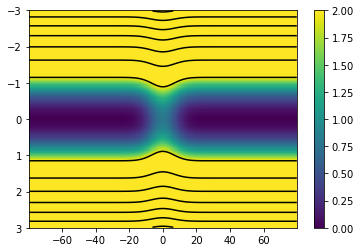

In [11]:
plt.pcolor(y,x,h)
plt.clim([0.,2.])
plt.colorbar()
plt.contour(y.flatten(),x.flatten(),h, colors='k')
plt.ylim([Lx/2.,-Lx/2.])

(3.0, -3.0)

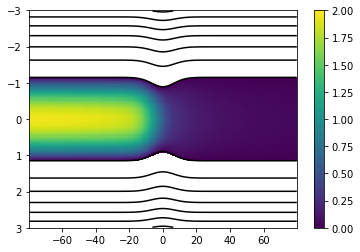

In [41]:
d = (ηinf/H - h) * (np.arctan(-2*λ*y)+np.pi/2)/np.pi
d[d<=0.] = np.nan

plt.contour(y.flatten(),x.flatten(),h, colors='k')
q = plt.pcolor(y,x,d)
q.set_clim([0,2.])
plt.colorbar()
plt.ylim([Lx/2.,-Lx/2.])

(3.0, -3.0)

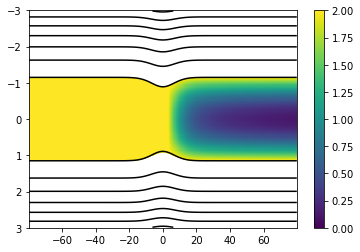

In [40]:
plt.contour(y.flatten(),x.flatten(),h, colors='k')
q = plt.pcolor(y,x,d+h)
q.set_clim([0,2.])
plt.colorbar()
plt.ylim([Lx/2.,-Lx/2.])